In [183]:
import pandas as pd
import os 
import matplotlib.pyplot as plt 
from pymongo import MongoClient
import pyodbc

In [26]:
files = [file for file in os.listdir('./Sales_Data') if file.endswith('.csv')]

In [32]:
df = pd.DataFrame()

for file in files:
    file_df = pd.read_csv('Sales_Data/'+file)
    df = pd.concat([df, file_df])

In [34]:
file_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [35]:
nan_df = df[df.isna().any(axis=1)]

In [36]:
len(nan_df)

545

In [37]:
# Droping null values to get some desire result and for clear dataframe
df = df.dropna(how='all')

In [38]:
len(df)

186305

In [40]:
# we have some inappropriate data in date column so we have to remove this 
temp_df = df[df['Order Date'].str[0:2]== 'Or']

In [41]:
len(temp_df)

355

In [46]:
# Removing the wrong date format data
df = df[df['Order Date'].str[0:2]!='Or']

In [64]:
# Adding new column to get actual date

df["Full Date"] = df['Order Date'].str[:8]

2025-01-26 08:55:30,781 [22320] WARNING  py.warnings:110: [JupyterRequire] c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until



In [67]:
df['Month'] = df['Order Date'].str[:2]

2025-01-26 08:56:58,289 [22320] WARNING  py.warnings:110: [JupyterRequire] c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.



In [78]:
df['Hour'] = df['Order Date'].str[9:11]

2025-01-26 08:59:45,232 [22320] WARNING  py.warnings:110: [JupyterRequire] c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.



In [79]:
df[['Order Date', 'Full Date', 'Month', 'Hour']].head()

,Order Date,Full Date,Month,Hour
0,04/19/19 08:46,04/19/19,04,08
2,04/07/19 22:30,04/07/19,04,22
3,04/12/19 14:38,04/12/19,04,14
4,04/12/19 14:38,04/12/19,04,14
5,04/30/19 09:27,04/30/19,04,09


In [80]:
months_mapping= {
    '01' :'January',
    '02' : 'Febrauary',
    '03' : 'March',
    '04' : 'April',
    '05' : 'May',
    '06' : 'June',
    '07' : 'July',
    '08' :'August',
    '09' :'September',
    '10' :'October',
    '11' :'November',
    '12' : 'December'
}

In [82]:
df['Months_name'] = df['Month'].map(months_mapping)

2025-01-26 10:19:52,313 [22320] WARNING  py.warnings:110: [JupyterRequire] c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.



In [83]:
df[['Month', 'Months_name']].head()

,Month,Months_name
0,04,April
2,04,April
3,04,April
4,04,April
5,04,April


In [88]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Full Date           object
Month               object
Hour                object
Months_name         object
dtype: object

In [89]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

2025-01-26 10:24:23,334 [22320] WARNING  py.warnings:110: [JupyterRequire] c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.



In [91]:
(df['Quantity Ordered']).dtype

dtype('int64')

In [93]:
df['Price Each'].dtype

dtype('O')

In [96]:
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce').astype(float)

In [97]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [105]:
df[['Quantity Ordered', 'Price Each', 'Sales']].head()

,Quantity Ordered,Price Each,Sales
0,2,11.95,23.90
2,1,99.99,99.99
3,1,600.00,600.00
4,1,11.99,11.99
5,1,11.99,11.99


In [101]:
df['Purchase Address'].head()

0            917 1st St, Dallas, TX 75001
2       682 Chestnut St, Boston, MA 02215
3    669 Spruce St, Los Angeles, CA 90001
4    669 Spruce St, Los Angeles, CA 90001
5       333 8th St, Los Angeles, CA 90001
Name: Purchase Address, dtype: object

In [ ]:
def get_city(address):
    try:
        return address.split(',')[1].strip()
    except IndexError:
        return None
    
def get_state(address):
    try:
        return address.split
    except IndexError:
        return None

In [102]:
# Corrected get_city function
def get_city(address):
    try:
        return address.split(',')[1].strip()
    except IndexError:
        return None  # Handle cases where the city part is missing

# Corrected get_state function
def get_state(address):
    try:
        return address.split(',')[2].split(' ')[1].strip()  # Use [1] for state abbreviation
    except IndexError:
        return None  # Handle cases where the state part is missing

In [103]:
df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})" if get_city(x) and get_state(x) else None)

In [ ]:
def get_city(address):
    try:
        return address.split(',')[1].strip()
    except IndexError:
        return None
    
def get_state(address):
    try:
        return address.split(',')[2].split(' ').strip()
    except IndexError:
        return None

In [106]:
df['Purchase Address']

0                   917 1st St, Dallas, TX 75001
2              682 Chestnut St, Boston, MA 02215
3           669 Spruce St, Los Angeles, CA 90001
4           669 Spruce St, Los Angeles, CA 90001
5              333 8th St, Los Angeles, CA 90001
                          ...                   
11681     840 Highland St, Los Angeles, CA 90001
11682    216 Dogwood St, San Francisco, CA 94016
11683       220 12th St, San Francisco, CA 94016
11684     511 Forest St, San Francisco, CA 94016
11685     250 Meadow St, San Francisco, CA 94016
Name: Purchase Address, Length: 185950, dtype: object

In [107]:
# convert Sales column to round figure 
df['Sales'] = df['Sales'].round(0).astype(int)

In [109]:
df['Sales'].dtype

dtype('int32')

In [111]:
df['Price Each'] = df['Price Each'].round(0).astype(int)

In [113]:
# To get highest Sales By City 

city_df = df.groupby('City')['Sales'].sum().reset_index()

In [115]:
df.groupby('City')['Sales'].sum().reset_index()

,City,Sales
0,Atlanta (GA),2796089
1,Austin (TX),1819974
2,Boston (MA),3662442
3,Dallas (TX),2768570
4,Los Angeles (CA),5453750
5,New York City (NY),4665294
6,Portland (ME),449861
7,Portland (OR),1871131
8,San Francisco (CA),8263965
9,Seattle (WA),2748337


In [116]:
df['City'].unique()

array(['Dallas (TX)', 'Boston (MA)', 'Los Angeles (CA)',
       'San Francisco (CA)', 'Seattle (WA)', 'Atlanta (GA)',
       'New York City (NY)', 'Portland (OR)', 'Austin (TX)',
       'Portland (ME)'], dtype=object)

In [118]:
cities = df['City'].unique()

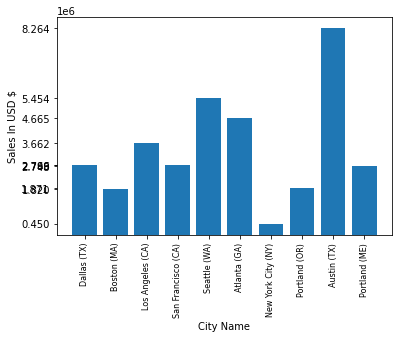

In [131]:
plt.bar(cities, city_df['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.yticks(city_df['Sales'])
plt.ylabel('Sales In USD $')
plt.xlabel('City Name')
plt.show()

In [129]:
city_df['Sales']

0    2796089
1    1819974
2    3662442
3    2768570
4    5453750
5    4665294
6     449861
7    1871131
8    8263965
9    2748337
Name: Sales, dtype: int32

In [130]:
city_df['Sales'].max()

8263965

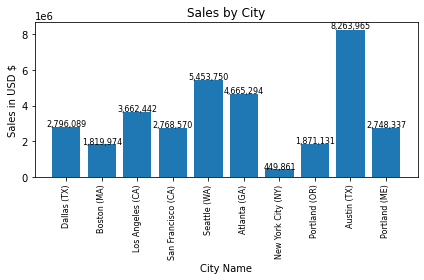

In [132]:
# Assuming cities and city_df['Sales'] are already defined
plt.bar(cities, city_df['Sales'])

# Add actual sales values on top of each bar
for i, value in enumerate(city_df['Sales']):
    plt.text(i, value + (value * 0.01),  # Adjust the position slightly above the bar
             f'{value:,.0f}',            # Format the value with commas and no decimals
             ha='center', fontsize=8)

# Formatting the plot
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD $')
plt.xlabel('City Name')
plt.title('Sales by City')
plt.tight_layout()  # Adjust layout for better readability
plt.show()


In [141]:
# Renaming the column names to get actual names

df.rename(columns={'Months_name': 'Month'}, inplace=True)

In [142]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Full Date', 'Month', 'Hour', 'Month', 'Sales',
       'City'],
      dtype='object')

# to change the vaue on basis of some condition
df.loc[
    df['Quantity Ordered']==2, 'Quantity Ordered'
]=2

In [144]:
df.loc[
    df['Quantity Ordered']==2, 'Quantity Ordered'
]=2

In [145]:
df1 = pd.read_excel('data_sets/Excel Project Dataset.xlsx', sheet_name='bike_buyers')

In [146]:
df1.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,M,F,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,M,M,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,M,M,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,S,M,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,S,M,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [149]:
df1['Marital Status'] = df1['Marital Status'].map({'M':'Married', 'S': 'Single'})

In [151]:
df1['Marital Status'].head()

0    Married
1    Married
2    Married
3     Single
4     Single
Name: Marital Status, dtype: object

In [152]:
df1['Marital Status'].value_counts()

Married    549
Single     477
Name: Marital Status, dtype: int64

In [153]:
len(df1)

1026

In [154]:
549+477

1026

In [157]:
df1['Gender'] = df1['Gender'].map({'F': 'Female', 'M':'Male'})

In [159]:
df1[['Marital Status', 'Gender']].head()

,Marital Status,Gender
0,Married,Female
1,Married,Male
2,Married,Male
3,Single,Male
4,Single,Male


In [160]:
df1['Gender'].value_counts()

Male      525
Female    501
Name: Gender, dtype: int64

In [164]:
gender_count = df1.groupby(['Marital Status', 'Gender']).size().unstack()
gender_count

Gender,Female,Male
Marital Status,,
Married,245,304
Single,256,221


In [165]:
gender_ratio = gender_count.div(gender_count.sum(axis=1), axis=0).reset_index()
gender_ratio

Gender,Marital Status,Female,Male
0,Married,0.446266,0.553734
1,Single,0.536688,0.463312


In [169]:
def connect_to_mongo():
    try:
        client = MongoClient("mongodb://localhost:27017/")
        print("Trying to Connect to the MongoDB")
        # Enforce to check database
        client.server_info()
        
        db = client.university
        collection = db.student
        
        print('Connected Successfully')
        return collection
        
    except Exception as e :
        print("An Error Occured While connecting to the Datase")
        print(e)

In [170]:
connect_to_mongo()

Trying to Connect to the MongoDB
Connected Successfully


Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'university'), 'student')

In [171]:
def fetch_record():
    collection = connect_to_mongo()
    if collection:
        query = {
            'name' : 'Hamza Khalid',
            'phone' :{'$regex' : '9800'}
        }
        try :
            data = collection.find(query)
            for record in data:
                print(record)
                
        except Exception as e :
            print('Error Occured while fetching the data')
            print(e)

In [172]:
fetch_record()

Trying to Connect to the MongoDB
Connected Successfully
{'_id': ObjectId('61489f1cac973c75b2ef9b2f'), 'id': 3, 'name': 'Hamza Khalid', 'phone': '03153459800', 'email': 'hamzakhalidcs007@gmail.com', 'subjects': 'physics'}


In [174]:
# Connecting to the databse
try:
    client = MongoClient('mongodb://localhost:27017/')
    print('Trying to Connect to the database')
    db = client.university
    collection = db.student
    print('Connected Successfully')
except Exception as e :
    print('Error occured while connecting to the database')
    print(e)

Trying to Connect to the database
Connected Successfully


In [179]:
# Fetching the record
try:
    if collection:
        query = {
            'name' : 'Hamza Khalid',
            'phone' : {'$regex' : '9800'}
        }
        data = collection.find(query)
        for record in data:
            print(record)
except Exception as e :
    print('Error occured while fetching the data')
    print(e)

{'_id': ObjectId('61489f1cac973c75b2ef9b2f'), 'id': 3, 'name': 'Hamza Khalid', 'phone': '03153459800', 'email': 'hamzakhalidcs007@gmail.com', 'subjects': 'physics'}


In [191]:
# working with sql server 
driver = '{SQL Server}'
server = 'DESKTOP-959UNBS'
database = 'Adventureworks'

In [192]:
try:
    conn = pyodbc.connect(
    "Driver="+driver+';'
    "Server="+server+';'
    "Database="+database+';'
    "Trusted_Connection=yes;"
    )
    print('Connected Successfully')
except Exception as e :
    print('Cannot Connect to the datase')
    print(e)

Connected Successfully


In [193]:
if conn:
    try:
        query = "select top 5 * from [Adventureworks].[HumanResources].[EmployeePayHistory]"
        data = pd.read_sql_query(query, conn)
        print(data)
        
    except Exception as e :
        print("Can not read the SQL query")
        print(e)
        
    finally:
        conn.close()

else:
    print("connection was not built, skipping the fetching record")

   BusinessEntityID RateChangeDate      Rate  PayFrequency ModifiedDate
0                 1     2009-01-14  183.7446             2   2014-06-30
1                 2     2008-01-31   82.5000             1   2014-06-30
2                 3     2007-11-11   49.5000             1   2014-06-30
3                 4     2007-12-05   12.6205             2   2007-11-21
4                 4     2010-05-31   34.7284             2   2010-05-16


In [200]:
# payload exercise 
data = {
    'BusinessEntityID' :[1,2,3],
    'FirstName' : ['John', 'Nick', 'Doe'],
    'LastName' : ['Doe', 'Nil', 'shawn']
}

df  =pd.DataFrame(data)

In [202]:
payload = []
for index, row in df.iterrows():
    row_data = {
        'BusinessEntityID': row['BusinessEntityID'],
        'FirstName' : row['FirstName'],
        'LastName' : row['LastName']
    }
    payload.append(row_data)
    
print(payload)

[{'BusinessEntityID': 1, 'FirstName': 'John', 'LastName': 'Doe'}, {'BusinessEntityID': 2, 'FirstName': 'Nick', 'LastName': 'Nil'}, {'BusinessEntityID': 3, 'FirstName': 'Doe', 'LastName': 'shawn'}]
